In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob

In [ ]:
'''ROOT_DIR = "/content/drive/MyDrive/Brain_Tumor_Dataset"
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

number_of_images.items()'''

'ROOT_DIR = "/content/drive/MyDrive/Brain_Tumor_Dataset"\nnumber_of_images = {}\n\nfor dir in os.listdir(ROOT_DIR):\n  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))\n\nnumber_of_images.items()'

# Splitting the data such that

* 70% for Train data
* 15% for Validation
* 15% for Evaluation

In [ ]:
# Creating Training folder
'''
if not os.path.exists('./train'):
  os.mkdir('.train')

  for dir in os.listdir(ROOT_DIR):
    os.makekirs('./train+dir')

    for img in np.random.choice(z=os.listdir(os.path.join(ROOT_DIR, dir,
                                                          size = (math.floor(70/100*number_of_images(dir))-2))))
'''

"\nif not os.path.exists('./train'):\n  os.mkdir('.train')\n\n  for dir in os.listdir(ROOT_DIR):\n    os.makekirs('./train+dir')\n\n    for img in np.random.choice(z=os.listdir(os.path.join(ROOT_DIR, dir,\n                                                          size = (math.floor(70/100*number_of_images(dir))-2))))\n"

In [ ]:
def datafolder(p, split):
  # Creating Training folder

  if not os.path.exists('./'+p):
    os.mkdir('./'+p)

    for dir in os.listdir(ROOT_DIR):
      os.makedirs('./'+p+'/'+dir)

      for img in np.random.choice(a = os.listdir(os.path.join(ROOT_DIR, dir) ),
                                  size = (math.floor(split*number_of_images[dir])-5),
                                  replace = False):
        O = os.path.join(ROOT_DIR, dir, img)
        D = os.path.join('./'+p,dir)
        shutil.copy(O,D)
        os.remove(O)
  else:
    print(f'{p}folder exist')

In [ ]:
datafolder('train', 0.7)  #Splitting 70% data for Training

In [ ]:
ROOT_DIR = "/content/drive/MyDrive/train"
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

number_of_images.items()

dict_items([('Negative', 1395), ('Positive', 2281)])

In [ ]:
datafolder('val', 0.15)   #Splitting 15% data for Validation

In [ ]:
ROOT_DIR = "/content/drive/MyDrive/val"
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

number_of_images.items()

dict_items([('Negative', 278), ('Positive', 487)])

In [ ]:
datafolder('test',0.15)   #Splitting 15% data for Testing

In [ ]:
ROOT_DIR = "/content/drive/MyDrive/test"
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

number_of_images.items()

dict_items([('Positive', 493), ('Negative', 303)])

In [ ]:
train_data.class_indices

{'Negative': 0, 'Positive': 1}

# Model Buiding

In [ ]:
pip install keras

In [ ]:
import keras
print(keras.__version__)

3.4.1


In [ ]:
pip install --upgrade keras tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.9 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [ ]:
# CNN Model

model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = (3,3),activation = 'relu',input_shape =(224,224,3)))

model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate = 0.25))

# Flatten before passing to Dense layers
model.add(Flatten())
model.add(Dense(units=64, activation= 'relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units = 1, activation = 'sigmoid'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       5,537,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,635,361 (21.50 MB)

 Trainable params: 5,635,361 (21.50 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer = 'adam', loss = keras.losses.binary_crossentropy, metrics = ['accuracy'])

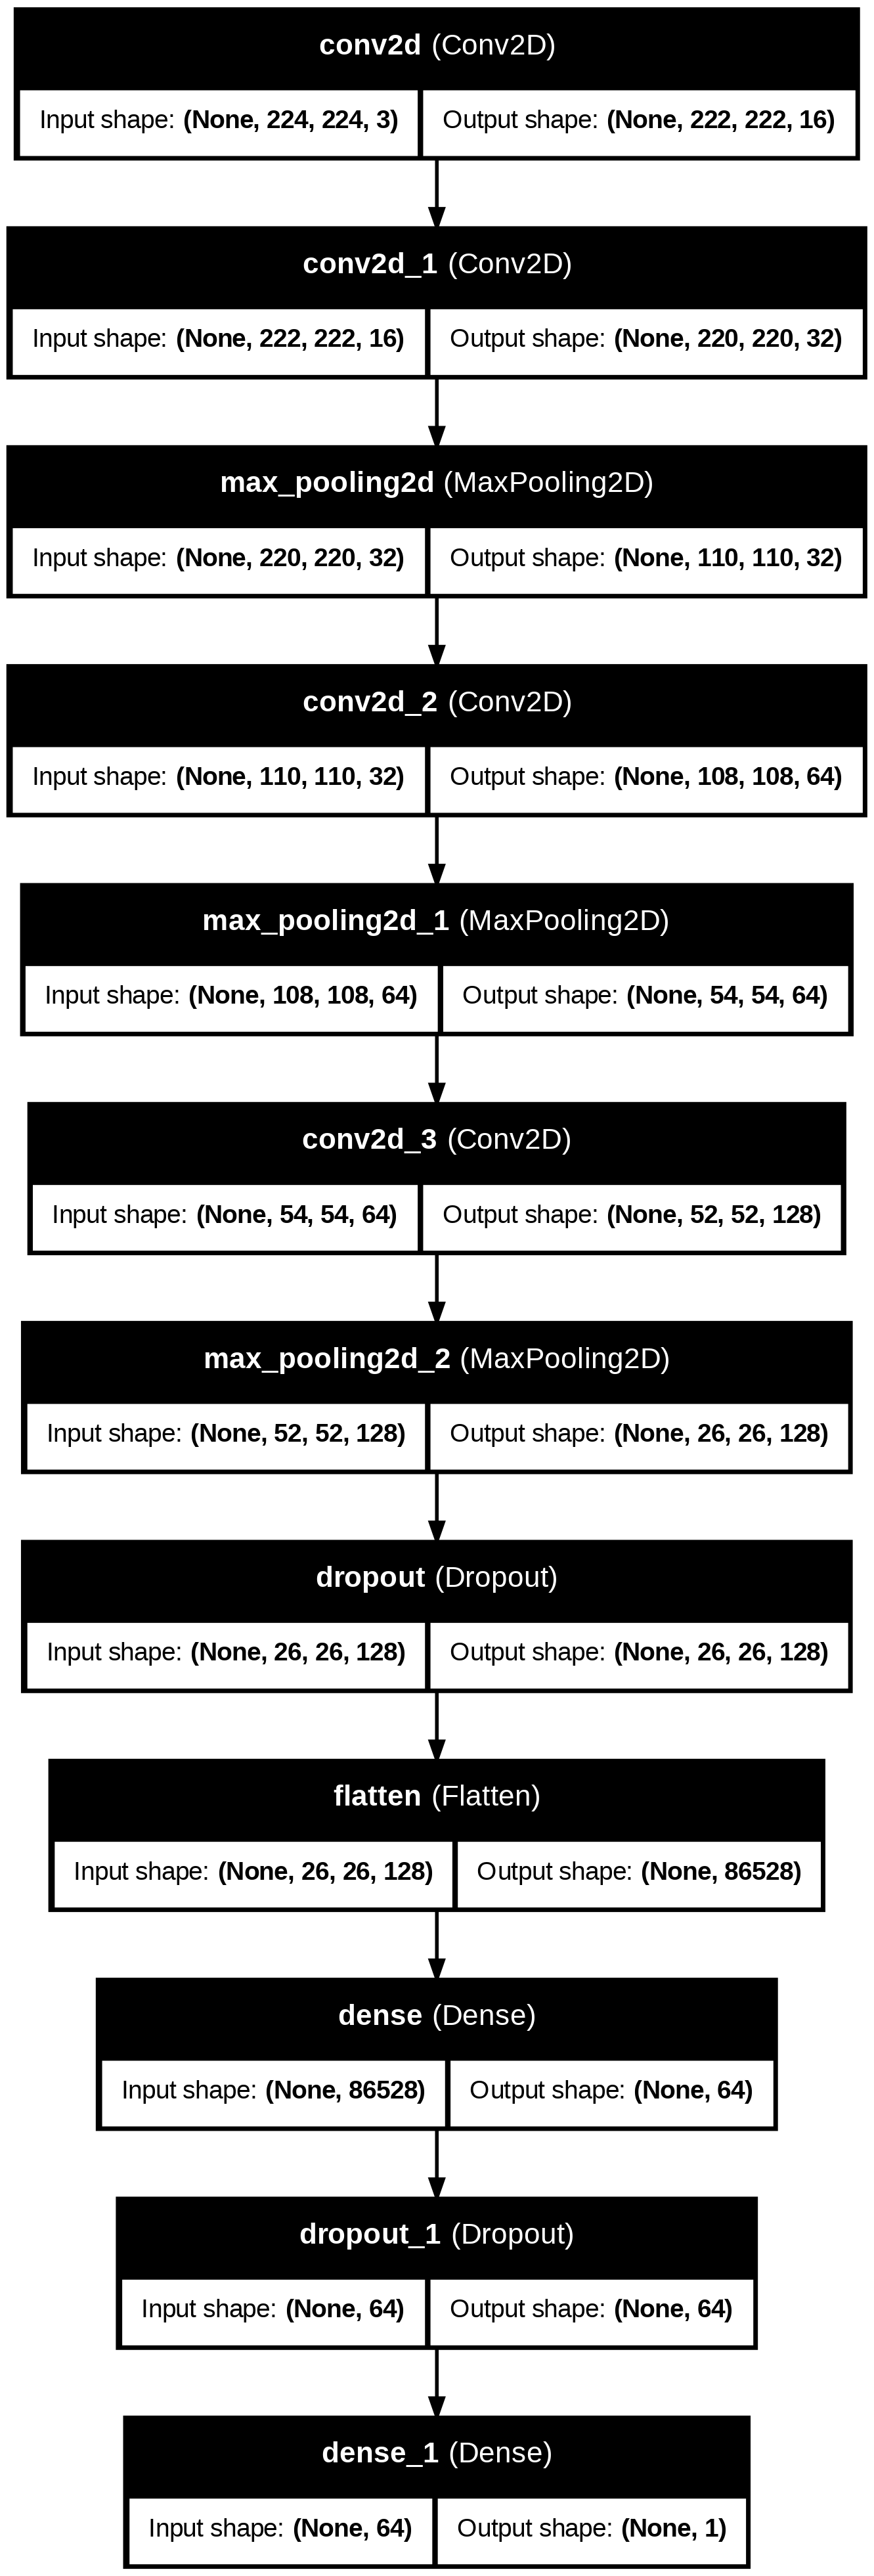

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)

# Preparing our data using Data Generator

In [ ]:
def preprocessingImages(path): # Data Augmentation
  '''
  Input : path
  output : pre processed images '''

  image_data = ImageDataGenerator(zoom_range = 0.2, shear_range= 0.2, rescale = 1/255, horizontal_flip = True) # Increasing dimension for deep pattern
  image = image_data.flow_from_directory(directory = path, target_size = (224, 224), batch_size = 32, class_mode = 'binary')

  return image

In [ ]:
def preprocessingImages2(path):
  '''
  Input : path
  output : pre processed images '''

  image_data = ImageDataGenerator(rescale=1/255 )
  image = image_data.flow_from_directory(directory = path, target_size = (224, 224), batch_size = 32, class_mode = 'binary')

  return image

In [ ]:
path = '/content/drive/MyDrive/val'
val_data = preprocessingImages2(path)

Found 765 images belonging to 2 classes.


In [ ]:
path = '/content/drive/MyDrive/test'
test_data = preprocessingImages2(path)

Found 796 images belonging to 2 classes.


In [ ]:
# Early stopping and model check point
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Early stopping

es = EarlyStopping(monitor = 'val_accuracy', min_delta = 0.01, patience = 5, verbose =1,mode = 'auto')

# Model Checkpoint
#mc = ModelCheckpoint(monitor = 'val_accuracy', filepath='./bestmodel.h5', verbose =1, save_best_only = 'True', mode = 'auto')
mc = ModelCheckpoint(monitor='val_accuracy', filepath='./bestmodel.keras', verbose=1, save_best_only=True, mode='auto')
cd = [es,mc]

# Model Training

In [ ]:
hs = model.fit(train_data,
                     steps_per_epoch = 8,
                     epochs = 30,
                     verbose = 1,
                     validation_data = val_data,
                     validation_steps = 16,
                     callbacks = cd)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  def workers(self):


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.6281 - loss: 0.7748
Epoch 1: val_accuracy improved from -inf to 0.73438, saving model to ./bestmodel.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 282s 31s/step - accuracy: 0.6262 - loss: 0.7697 - val_accuracy: 0.7344 - val_loss: 0.6018
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.6330 - loss: 0.5989
Epoch 2: val_accuracy improved from 0.73438 to 0.78656, saving model to ./bestmodel.keras


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


8/8 ━━━━━━━━━━━━━━━━━━━━ 62s 9s/step - accuracy: 0.6417 - loss: 0.5936 - val_accuracy: 0.7866 - val_loss: 0.4204
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8011 - loss: 0.4446
Epoch 3: val_accuracy improved from 0.78656 to 0.79297, saving model to ./bestmodel.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 60s 9s/step - accuracy: 0.7985 - loss: 0.4471 - val_accuracy: 0.7930 - val_loss: 0.4106
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step - accuracy: 0.7699 - loss: 0.4898
Epoch 4: val_accuracy improved from 0.79297 to 0.84980, saving model to ./bestmodel.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.7716 - loss: 0.4885 - val_accuracy: 0.8498 - val_loss: 0.3710
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8940 - loss: 0.3322
Epoch 5: val_accuracy improved from 0.84980 to 0.87695, saving model to ./bestmodel.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 45s 6s/step - accuracy: 0.8906 - loss: 0.3332 - val_accuracy: 0.8770 - val_loss: 0.3053
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━

In [ ]:
h = hs.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

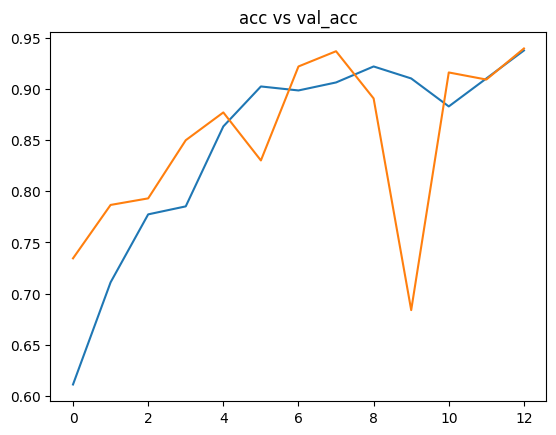

In [ ]:
import matplotlib.pyplot as plt

plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'])

plt.title('acc vs val_acc')
plt.show()

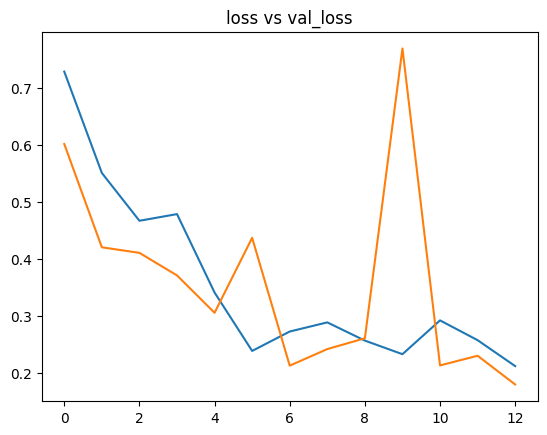

In [ ]:
import matplotlib.pyplot as plt

plt.plot(h['loss'])
plt.plot(h['val_loss'])

plt.title('loss vs val_loss')
plt.show()

In [ ]:
# model accuracy

from keras.models import load_model

model = load_model('/content/bestmodel.keras')


# Model Accuracy

In [ ]:
acc = model.evaluate(test_data)[1]
print(f'the accuracy of our model is {acc*100}%')

25/25 ━━━━━━━━━━━━━━━━━━━━ 250s 10s/step - accuracy: 0.9332 - loss: 0.1864
the accuracy of our model is 93.34170818328857%


In [ ]:
from keras.preprocessing.image import load_img, img_to_array

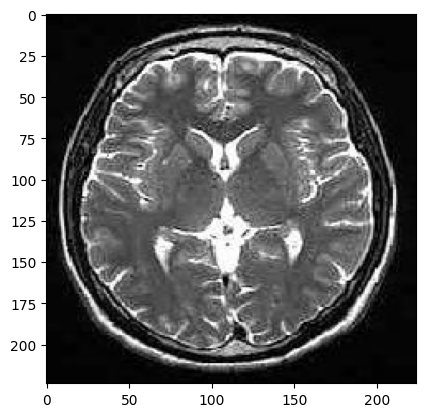

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
The image is not having Tumour


In [ ]:
# Testing model's performance from one single image by using img path
path ='/content/drive/MyDrive/train/Negative/Tr-no_0461.jpg '

img = load_img(path, target_size = (224,224))
input_arr = img_to_array(img)/255

plt.imshow(input_arr)
plt.show()

input_arr.shape

input_arr = np.expand_dims(input_arr, axis = 0)

pred = model.predict(input_arr)[0][0]
pred

if pred == 0:
  print('The image is having Tumour')
else:
  print('The image is not having Tumour')

# Transfer Learning
## Our Model Accuracy is 93% which is fine, but not great
## So we need to do increase the model's accuracy

Image Preprocessing

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet import preprocess_input

In [ ]:
def preprocessingImages(path): # Data Augmentation
  '''
  Input : path
  output : pre processed images '''

  image_data = ImageDataGenerator(zoom_range = 0.2, shear_range= 0.2, preprocessing_function = preprocess_input, horizontal_flip = True) # Increasing dimension for deep pattern
  image = image_data.flow_from_directory(directory = path, target_size = (224, 224), batch_size = 32, class_mode = 'binary')

  return image

In [ ]:
def preprocessingImages2(path):
  '''
  Input : path
  output : pre processed images '''

  image_data = ImageDataGenerator(preprocessing_function = preprocess_input)
  image = image_data.flow_from_directory(directory = path, target_size = (224, 224), batch_size = 32, class_mode = 'binary')

  return image

In [ ]:
path = '/content/drive/MyDrive/train'
train_data = preprocessingImages(path)

Found 3676 images belonging to 2 classes.


In [ ]:
path = '/content/drive/MyDrive/test'
test_data = preprocessingImages2(path)

Found 796 images belonging to 2 classes.


In [ ]:
path = '/content/drive/MyDrive/val'
val_data = preprocessingImages2(path)

Found 694 images belonging to 2 classes.


### Model Training

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Flatten, Dense
from keras.models import Model, load_model
from keras.applications import MobileNet
import keras

In [ ]:
base_model = MobileNet(input_shape = (224,224,3), include_top = False)

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
X = Flatten()(base_model.output)
X = Dense(units = 1, activation  = 'sigmoid')(X)
model = Model(base_model.input, X)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

In [ ]:
model.compile(optimizer = 'rmsprop',
              loss = keras.losses.binary_crossentropy,
              metrics = ['accuracy'])

In [ ]:
## call backs
from keras.callbacks import ModelCheckpoint, EarlyStopping
#Model check point
mc = ModelCheckpoint(filepath = 'bestmodel.keras', monitor = 'val_accuracy', save_best_only = True)

# Early Stopping
es = EarlyStopping(monitor = 'val_accuracy', min_delta = 0.01, patience = 3, verbose = 1)

cb = [mc,es]

In [ ]:
hist = model.fit(train_data,
          steps_per_epoch=8,
          epochs = 30,
          validation_data = val_data,
          validation_steps = 16,
          callbacks = cb)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 662s 69s/step - accuracy: 0.6555 - loss: 4.3484 - val_accuracy: 0.9219 - val_loss: 0.5957
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15s/step - accuracy: 0.7883 - loss: 2.3479 

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


8/8 ━━━━━━━━━━━━━━━━━━━━ 126s 18s/step - accuracy: 0.7949 - loss: 2.2567 - val_accuracy: 0.9341 - val_loss: 0.5192
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 171s 24s/step - accuracy: 0.9713 - loss: 0.1791 - val_accuracy: 0.9336 - val_loss: 0.4648
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 73s 10s/step - accuracy: 0.9481 - loss: 0.6886 - val_accuracy: 0.9231 - val_loss: 0.7414
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 117s 15s/step - accuracy: 0.9687 - loss: 0.3047 - val_accuracy: 0.9590 - val_loss: 0.3292
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 131s 18s/step - accuracy: 0.8795 - loss: 1.4227 - val_accuracy: 0.9560 - val_loss: 0.4249
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 77s 11s/step - accuracy: 0.9652 - loss: 0.5172 - val_accuracy: 0.9766 - val_loss: 0.2331
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 95s 12s/step - accuracy: 0.9888 - loss: 0.0620 - val_accuracy: 0.9670 - val_loss: 0.1948
Epoch 9/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 89s 11s/step - accuracy: 0.8828 - loss: 1.0386 - val_accuracy: 0.9609 - val_loss: 0.3462
Epoch 1

In [ ]:
# load best fit model

model = load_model('/content/drive/MyDrive/bestmodel.keras')

In [ ]:
acc = model.evaluate(test_data)[1]
print(f'model accuracy is {acc*100}%')

25/25 ━━━━━━━━━━━━━━━━━━━━ 402s 17s/step - accuracy: 0.9456 - loss: 0.5763
model accuracy is 95.85427045822144%


In [ ]:
h = hist.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

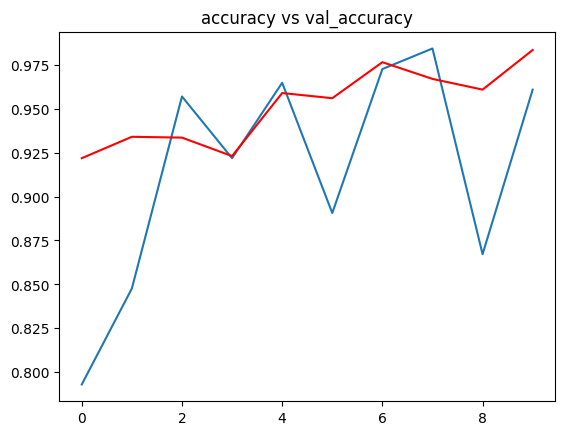

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'],c = 'red')
plt.title('accuracy vs val_accuracy')
plt.show()

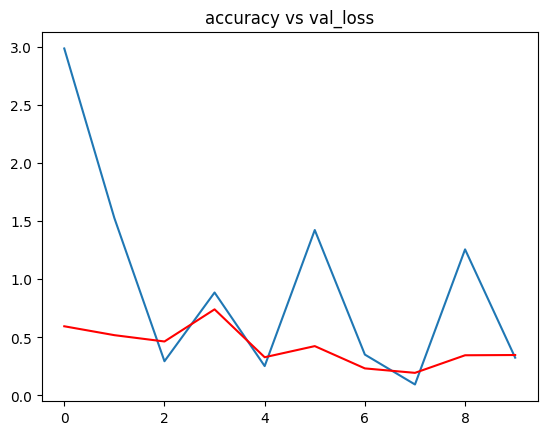

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'],c = 'red')
plt.title('accuracy vs val_loss')
plt.show()

In [ ]:
from keras.preprocessing import image

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


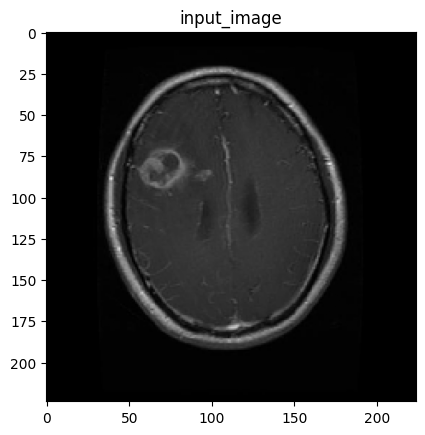

The image is having Tumour


In [ ]:
# Testing model's performance from one single image by using img path
path ='/content/drive/MyDrive/test/Positive/Te-gl_0027.jpg'

img = image.load_img(path, target_size = (224,224))
i = image.img_to_array(img)/255
input_arr = np.array([i])

input_arr.shape

pred = np.argmax(model.predict(input_arr)) #

#To display the image
plt.imshow(input_arr[0])
plt.title('input_image')
plt.show()

if pred == 0:
  print('The image is having Tumour')
else:
  print('The image is not having Tumour')



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


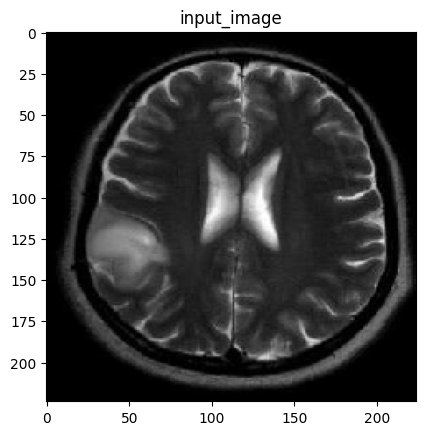

The image is having Tumour


In [ ]:
# Testing model's performance from one single image by using img path
path ='/content/drive/MyDrive/test/Negative/Te-no_0128.jpg'

img = image.load_img(path, target_size = (224,224))
i = image.img_to_array(img)/255
input_arr = np.array([i])

input_arr.shape

pred = np.argmax(model.predict(input_arr)) #

#To display the image
plt.imshow(input_arr[0])
plt.title('input_image')
plt.show()

if pred == 0:
  print('The image is having Tumour')
else:
  print('The image is not having Tumour')

In [ ]:
# Print the model's softmax output
print(f"Softmax Output: {predictions}")

# Print the predicted class and confidence
pred_class = np.argmax(predictions)
confidence = np.max(predictions)
print(f"Predicted Class: {pred_class}")
print(f"Confidence Score: {confidence}")

Softmax Output: [[1.8768134e-12]]
Predicted Class: 0
Confidence Score: 1.8768133748514604e-12


# Streamlit Part

In [ ]:
!pip install --upgrade streamlit
!pip show streamlit

In [ ]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt

@st.cache_resource
def load_model():
    model = tf.keras.models.load_model('/content/drive/MyDrive/bestmodel.keras')
    return model

model = load_model()

st.write('''
          # Brain Tumor Detection
''')

file = st.file_uploader('Upload your Brain MRI Image', type=['jpg', 'png'])

def import_and_predict(image_data, model):
    image = Image.open(image_data).convert('RGB')
    image = ImageOps.fit(image, (224, 224), Image.ANTIALIAS)
    img_array = np.array(image) / 255.0
    input_arr = np.expand_dims(img_array, axis=0)  # Add batch dimension

    predictions = model.predict(input_arr)
    pred_class = np.argmax(predictions)
    return pred_class, img_array

if file is None:
    st.text('Please upload an image file')
else:
    pred, img_array = import_and_predict(file, model)



    if pred == 0:
        st.text('The image shows a Tumor')
    else:
        st.text('The image does not show a Tumor')

    # Display the uploaded image
    st.image(img_array, caption='Uploaded Image', use_column_width=True)


Overwriting app.py


In [ ]:
!ngrok config add-authtoken 2kgYKmgxwBU1FWGI8hKYUnBIb3a_4f272W59urf76L6Ef7XqC

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
!nohup streamlit run app.py &

nohup: appending output to 'nohup.out'


In [ ]:
pip install --upgrade pyngrok

In [ ]:
!ngrok disconnect --all

ngrok - tunnel local ports to public URLs and inspect traffic

USAGE:
  ngrok [command] [flags]

AUTHOR:
  ngrok - <support@ngrok.com>

COMMANDS: 
  config          update or migrate ngrok's configuration file
  http            start an HTTP tunnel
  tcp             start a TCP tunnel
  tunnel          start a tunnel for use with a tunnel-group backend

EXAMPLES: 
  ngrok http 80                                                 # secure public URL for port 80 web server
  ngrok http --domain baz.ngrok.dev 8080                        # port 8080 available at baz.ngrok.dev
  ngrok tcp 22                                                  # tunnel arbitrary TCP traffic to port 22
  ngrok http 80 --oauth=google --oauth-allow-email=foo@foo.com  # secure your app with oauth

Paid Features: 
  ngrok http 80 --domain mydomain.com                           # run ngrok with your own custom domain
  ngrok http 80 --allow-cidr 2600:8c00::a03c:91ee:fe69:9695/32  # run ngrok with IP policy restrictions

In [ ]:
!ngrok kill

ngrok - tunnel local ports to public URLs and inspect traffic

USAGE:
  ngrok [command] [flags]

AUTHOR:
  ngrok - <support@ngrok.com>

COMMANDS: 
  config          update or migrate ngrok's configuration file
  http            start an HTTP tunnel
  tcp             start a TCP tunnel
  tunnel          start a tunnel for use with a tunnel-group backend

EXAMPLES: 
  ngrok http 80                                                 # secure public URL for port 80 web server
  ngrok http --domain baz.ngrok.dev 8080                        # port 8080 available at baz.ngrok.dev
  ngrok tcp 22                                                  # tunnel arbitrary TCP traffic to port 22
  ngrok http 80 --oauth=google --oauth-allow-email=foo@foo.com  # secure your app with oauth

Paid Features: 
  ngrok http 80 --domain mydomain.com                           # run ngrok with your own custom domain
  ngrok http 80 --allow-cidr 2600:8c00::a03c:91ee:fe69:9695/32  # run ngrok with IP policy restrictions

In [ ]:
from pyngrok import ngrok

# Ensure you are specifying the correct port
port = 8501
ngrok_tunnel = ngrok.connect(port, "http")
print("Streamlit app will be accessible at:", ngrok_tunnel.public_url)

In [ ]:
!cat /content/nohup.out




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.122.92.140:8501

2024-08-15 08:15:54.587998: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-15 08:15:55.038479: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-15 08:15:55.162659: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-15 08:15:55.323998: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To